# ADITYA DUTTA, aditya-dutta213, 5126-4191-24

## HW 8:

## 1.Supervised, Semi-Supervised, and Unsupervised Learning

### Importing the packages

In [123]:
# Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re,random
from numpy import linalg
from sklearn import svm
import warnings
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,hamming_loss
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score,auc,pairwise_distances_argmin_min,pairwise_distances_argmin
from sklearn.metrics import roc_auc_score,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.special import softmax
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

**1. (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
 %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/
 machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
 has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
 two output classes.**

In [125]:
# Read data
file_path = '../data/wdbc.data'
name_file = '../data/wdbc.names'

data = pd.read_csv(file_path, sep=',', skiprows=0, header=None)
data.columns = ['id', 'label'] + ['Feat_' + str(i + 1) for i in range(data.shape[1] - 2)]
data = data.iloc[:, 1:]
data


,label,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,...,Feat_21,Feat_22,Feat_23,Feat_24,Feat_25,Feat_26,Feat_27,Feat_28,Feat_29,Feat_30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [126]:
data.describe()

,Feat_1,Feat_2,Feat_3,Feat_4,Feat_5,Feat_6,Feat_7,Feat_8,Feat_9,Feat_10,...,Feat_21,Feat_22,Feat_23,Feat_24,Feat_25,Feat_26,Feat_27,Feat_28,Feat_29,Feat_30
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [127]:
# Set class B as 0 and M as 1
data.replace({'B': 0, 'M': 1}, inplace=True)

In [128]:
# Count data in each class by grouping
data.groupby(['label']).agg({'label': ['count']})

,label
,count
label,
0,357
1,212


### (b) Monte-Carlo Simulation: 
#### Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and used randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compared the average scores (accuracy, precision, recall, F1-score, and AUC) that you obtain from each algorithm.m.**

In [130]:
X = data.loc[:, ~data.columns.isin(['label'])]
y = data.loc[:, data.columns.isin(['label'])]

In [131]:
# Split the data into X and Y -stratified split

def split_data(features, labels, train_size, random_state):
    train_X, test_X, train_Y, test_Y = train_test_split(
        features, labels, train_size=train_size, random_state=random_state, stratify=labels
    )
    return train_X, test_X, train_Y, test_Y


In [132]:
# Function to evaluate classification results
def eval_metrics(true_labels, pred_labels, pred_probs, report_dict):
    metrics_output = {}
    fpr, tpr, thresholds = roc_curve(true_labels, pred_probs)
    metrics_output['auc_score'] = round(auc(fpr, tpr), 3)
    metrics_output['accuracy_score'] = round(report_dict['accuracy'], 3)
    metrics_output['precision_score'] = round(report_dict['weighted avg']['precision'], 3)
    metrics_output['recall_score'] = round(report_dict['weighted avg']['recall'], 3)
    metrics_output['f1_score'] = round(report_dict['weighted avg']['f1-score'], 3)
    
    return metrics_output

### 1. (b) i. Supervised Learning: Train an L1-penalized SVM to classify the data.
#### Use 5 fold cross validation to choose the penalty parameter. 
#### Use normalized data. 
#### Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. 
#### Plot the ROC and report the confusion matrix for training and testing in one of the runs.
.**


In [134]:
# Func to plot ROC_AUC graph
def plot_roc_curve(true_labels, pred_labels, pred_probs):
    print(confusion_matrix(true_labels, pred_labels))
    fpr, tpr, threshold = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)
    
    fig, axes = plt.subplots(figsize=(12, 7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.3f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [135]:
# Useful LInks: 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# Prompt used: "How do I correctly define a parameter grid for SVM, especially when using an RBF kernel, and decide on the number of cross-validation folds and scoring metrics?", (5 lines), GPT-Generated
# Response:
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf'], 'gamma': ['scale', 'auto']}
# grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1_weighted')
# grid_search.fit(X_train, y_train)
# print("Best Parameters:", grid_search.best_params_)
# # Use 'gamma' to define the width of the RBF kernel and 'C' for penalty; 'cv=5' allows cross-validation with 5 splits.

def svm_classifier(train_features, train_labels, test_features, test_labels, model, param_grid, plot_roc=False):
    
    # Perform GridSearchCV to select the best parameters from the hyperparameters
    grid_search = GridSearchCV(estimator=model, **param_grid)
    grid_search.fit(train_features, train_labels)
        
    # Return the best set of parameters
    print('Best Parameters:', grid_search.best_params_)
    
    pred_train = grid_search.predict(train_features)
    prob_train = grid_search.decision_function(train_features)
    
    report_train = classification_report(train_labels, pred_train, output_dict=True)
    train_results = eval_metrics(train_labels, pred_train, prob_train, report_train)
        
    pred_test = grid_search.predict(test_features)
    prob_test = grid_search.decision_function(test_features)
    
    report_test = classification_report(test_labels, pred_test, output_dict=True)
    test_results = eval_metrics(test_labels, pred_test, prob_test, report_test)
    
    print('Train Accuracy Score:', train_results['accuracy_score'], 'Test Accuracy Score:', test_results['accuracy_score'])
    
    if plot_roc:
        print('Classification Report and AUC-ROC Curve for Training Data')
        plot_roc_curve(train_labels, pred_train, prob_train)
        
        print('Classification Report and AUC-ROC Curve for Testing Data')
        plot_roc_curve(test_labels, pred_test, prob_test)
    
    return train_results, test_results




----------------------------------------------------------------------------------------------------------

In [137]:
# Parameter tuning setup
param_range = {'C': np.logspace(-3, 6, 10)}
cross_val = StratifiedKFold(5, random_state=50, shuffle=True)
tuning_params = {'param_grid': param_range, 'cv': cross_val, 'scoring': 'f1_weighted', 'verbose': 0}

In [138]:
# Run Monte Carlo simulation for L1-penalized SVM
def monte_carlo_svm(num_runs):
    train_results_mc = []
    test_results_mc = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X, y, train_size=0.8, random_state=run * 59)
        scaler = MinMaxScaler()
        train_features_norm = scaler.fit_transform(train_features)
        test_features_norm = scaler.transform(test_features)
        
        print('\nRun:', run + 1, '-->')
        if run == num_runs - 1:
            train_eval, test_eval = svm_classifier(
                train_features_norm, train_labels, test_features_norm, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params, True
            )
            print('-----------------------------------------------------------------------------------------------------------')
            print('\nThe ROC and the confusion matrix for training and testing in the last run:')
        else:
            train_eval, test_eval = svm_classifier(
                train_features_norm, train_labels, test_features_norm, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params, False
            )
        
        train_results_mc.append(train_eval)
        test_results_mc.append(test_eval)
    
    train_results_df = pd.DataFrame(train_results_mc)
    test_results_df = pd.DataFrame(test_results_mc)
    
    summary_output = pd.concat([train_results_df.mean(), test_results_df.mean()], axis=1)
    summary_output.columns = ['Train', 'Test']
    
    print('-----------------------------------------------------------------------------------------------------------')
    print('\nSummary')
    print(summary_output)
    
    return summary_output



Run: 1 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.989 Test Accuracy Score: 0.974

Run: 2 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.98 Test Accuracy Score: 0.974

Run: 3 -->
Best Parameters: {'C': 100.0}
Train Accuracy Score: 0.989 Test Accuracy Score: 0.982

Run: 4 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.978 Test Accuracy Score: 0.974

Run: 5 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.982 Test Accuracy Score: 0.974

Run: 6 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.987 Test Accuracy Score: 0.956

Run: 7 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.985 Test Accuracy Score: 0.974

Run: 8 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.987 Test Accuracy Score: 0.982

Run: 9 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.985 Test Accuracy Score: 0.991

Run: 10 -->
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.98 Test Accuracy Score: 0.974

Run: 11 -->
Best Parameters: {'C': 10.0}
Train A

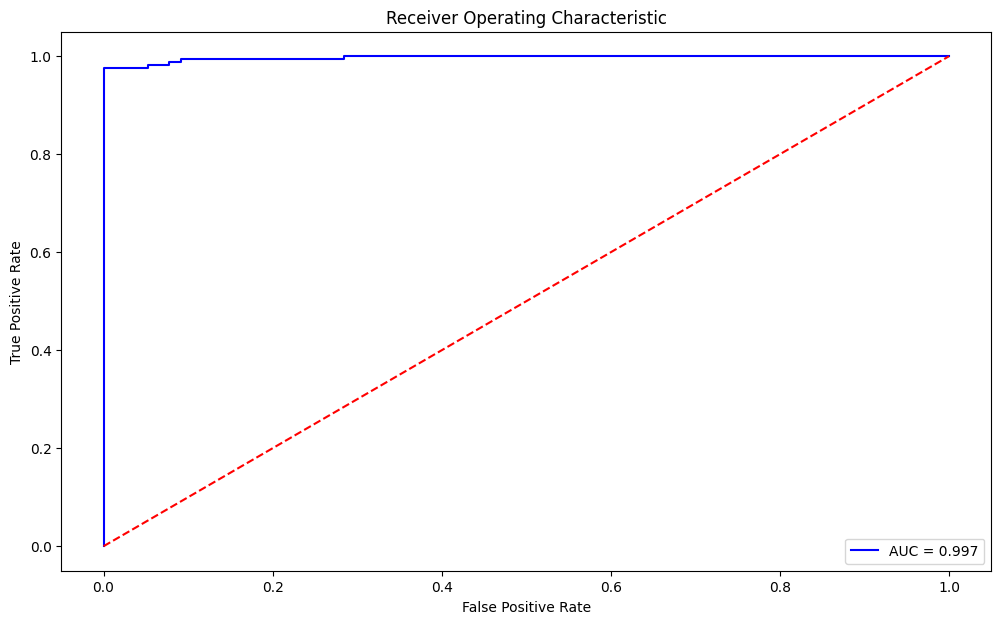

Classification Report and AUC-ROC Curve for Testing Data
[[72  0]
 [ 2 40]]


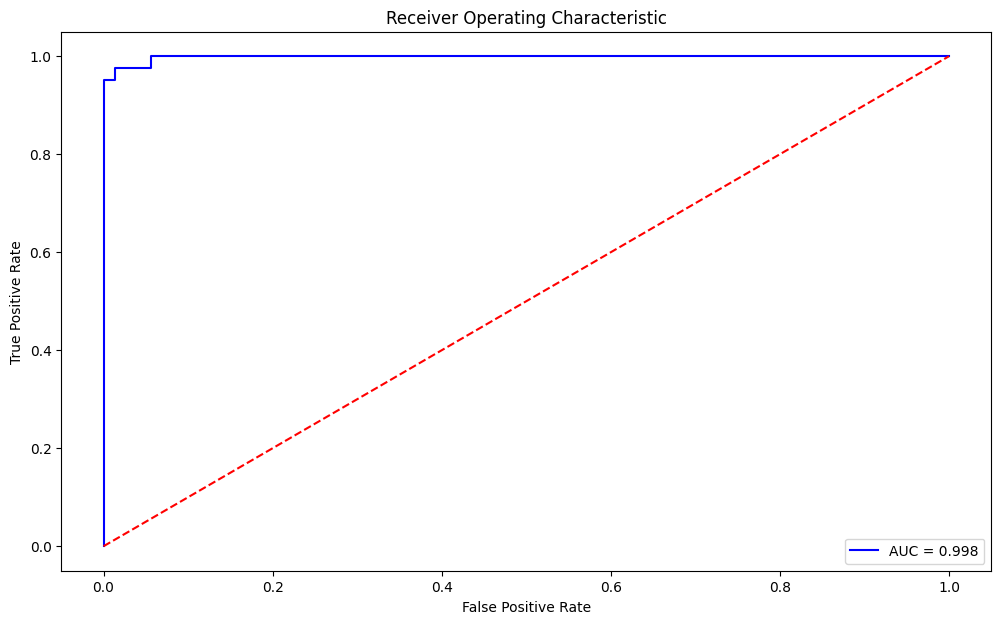

-----------------------------------------------------------------------------------------------------------

The ROC and the confusion matrix for training and testing in the last run:
-----------------------------------------------------------------------------------------------------------

Summary
                    Train      Test
auc_score        0.997733  0.991433
accuracy_score   0.985933  0.969267
precision_score  0.986000  0.969967
recall_score     0.985933  0.969267
f1_score         0.985933  0.969100


In [139]:
supervised_output = monte_carlo_svm(30)

## 1.(b) ii. Semi-Supervised Learning/ Self-training: 
#### 1.Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data.  
#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.
#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Tested the final SVM on the test data and the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. 
#### Plot the ROC and report the confusion matrix for training and testing in one of the runs.f the runs.

In [142]:
# Prompt used: "How can I implement semi-supervised learning by using SVM with GridSearchCV for hyperparameter optimization while iteratively labeling data?", (6 lines), GPT-Generated
# Response:
# labeled_indices, unlabeled_indices = split_data(train_features, train_labels)
# grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, scoring='f1_weighted')
# grid_search.fit(labeled_data['features'], labeled_data['labels'])
# while len(unlabeled_data) > 0:
#     prediction_scores = grid_search.decision_function(unlabeled_data['features'])
#     update_labeled_data_based_on_uncertainty(prediction_scores, unlabeled_data)
#     grid_search.fit(labeled_data['features'], labeled_data['labels'])
# print("Optimal Parameters:", grid_search.best_params_)

# SVM classifier for semi supervised
def svm_classifier_semi(train_features, train_labels, test_features, test_labels, model, param_grid, plot_roc=False):
    
    labeled_indices = []
    for label in [0, 1]:
        label_idx = np.where(train_labels == label)
        split_idx = np.random.choice(label_idx[0], round(len(label_idx[0]) * 0.5), replace=False)
        labeled_indices.extend(split_idx)
    
    unlabeled_indices = [i for i in range(len(train_features)) if i not in labeled_indices]
    
    labeled_x = train_features[labeled_indices].tolist()
    labeled_y = train_labels.iloc[labeled_indices].to_numpy().tolist()
    unlabeled_x = train_features[unlabeled_indices].tolist()
    unlabeled_y = train_labels.iloc[unlabeled_indices].to_numpy().tolist()
    
    grid_search = GridSearchCV(estimator=model, **param_grid)
    grid_search.fit(labeled_x, labeled_y)
    
    while len(unlabeled_x) > 0:
        pred_scores = grid_search.decision_function(unlabeled_x)
        sorted_indices = sorted(range(len(unlabeled_x)), key=lambda x: abs(pred_scores[x]))
        
        unlabeled_x = [unlabeled_x[i] for i in sorted_indices]
        unlabeled_y = [unlabeled_y[i] for i in sorted_indices]
        
        labeled_x.append(unlabeled_x.pop())
        labeled_y.append(unlabeled_y.pop())
        
        grid_search.best_estimator_.fit(labeled_x, labeled_y)
    
    # Output best parameters
    print('Best Parameters:', grid_search.best_params_)
    
    pred_train = grid_search.predict(train_features)
    prob_train = grid_search.decision_function(train_features)
    report_train = classification_report(train_labels, pred_train, output_dict=True)
    
    train_results = eval_metrics(train_labels, pred_train, prob_train, report_train)
        
    pred_test = grid_search.predict(test_features)
    prob_test = grid_search.decision_function(test_features)
    
    report_test = classification_report(test_labels, pred_test, output_dict=True)
    test_results = eval_metrics(test_labels, pred_test, prob_test, report_test)
    
    print('Train Accuracy Score:', train_results['accuracy_score'], 'Test Accuracy Score:', test_results['accuracy_score'])
    
    if plot_roc:
        print('Classification Report and AUC-ROC Curve for Training Data')
        plot_roc_curve(train_labels, pred_train, prob_train)
        
        print('Classification Report and AUC-ROC Curve for Testing Data')
        plot_roc_curve(test_labels, pred_test, prob_test)
    
    return train_results, test_results


In [143]:
# Parameter tuning setup 
param_range_semi = {'C': np.logspace(-3, 6, 10)}
cross_val_semi = StratifiedKFold(5, random_state=50, shuffle=True)
tuning_params_semi = {'param_grid': param_range_semi, 'cv': cross_val_semi, 'scoring': 'f1_weighted', 'verbose': 0}

In [144]:
def monte_carlo_svm_semi(num_runs):
    train_results_mc = []
    test_results_mc = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X, y, train_size=0.8, random_state=run * 3000)
        print('\nRun:', run + 1, '-->')
        
        print('Shape --> train_features:', train_features.shape, ' test_features:', test_features.shape, 
              ' train_labels:', train_labels.shape, ' test_labels:', test_labels.shape)
        
        scaler = MinMaxScaler()
        train_features_norm = scaler.fit_transform(train_features)
        test_features_norm = scaler.transform(test_features)
      
        if run == num_runs - 1:
            train_eval, test_eval = svm_classifier_semi(
                train_features_norm, train_labels, test_features_norm, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_semi, True
            )
            print('-----------------------------------------------------------------------------------------------------------')
            print('\nThe ROC and the confusion matrix for training and testing in the last run:')
        else:
            train_eval, test_eval = svm_classifier_semi(
                train_features_norm, train_labels, test_features_norm, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_semi, False
            )
        
        train_results_mc.append(train_eval)
        test_results_mc.append(test_eval)
        
    train_results_df = pd.DataFrame(train_results_mc)
    test_results_df = pd.DataFrame(test_results_mc)
    
    summary_output = pd.concat([train_results_df.mean(), test_results_df.mean()], axis=1)
    summary_output.columns = ['Train', 'Test']
    
    print('-----------------------------------------------------------------------------------------------------------')
    print('\nSummary')
    print(summary_output)
    
    return summary_output



Run: 1 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.989 Test Accuracy Score: 0.974

Run: 2 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.987 Test Accuracy Score: 0.991

Run: 3 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.978 Test Accuracy Score: 0.965

Run: 4 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.987 Test Accuracy Score: 0.982

Run: 5 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Best Parameters: {'C': 1.0}
Train Accuracy Score: 0.989 Test Ac

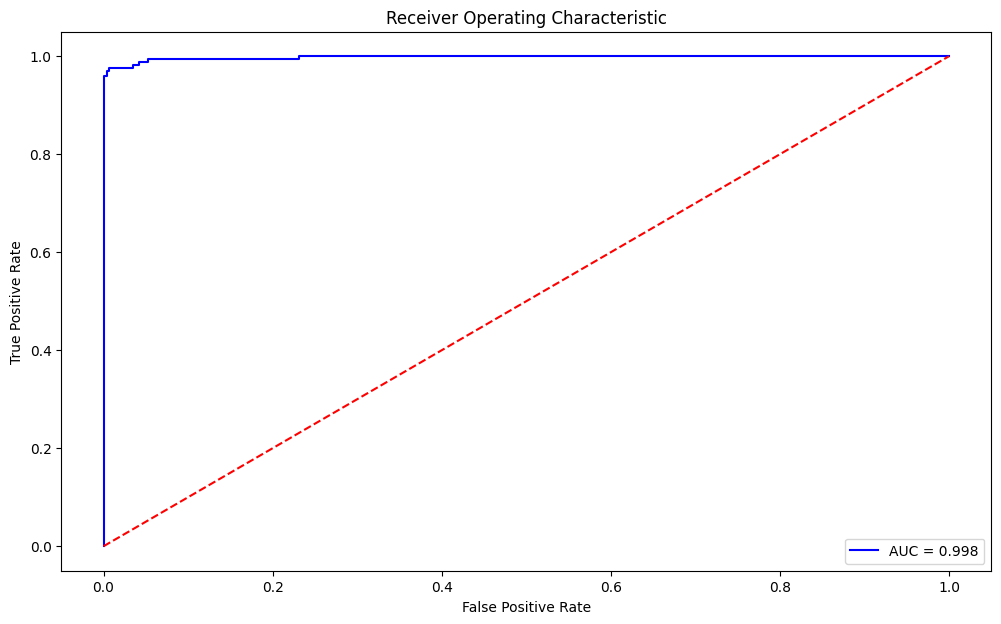

Classification Report and AUC-ROC Curve for Testing Data
[[72  0]
 [ 6 36]]


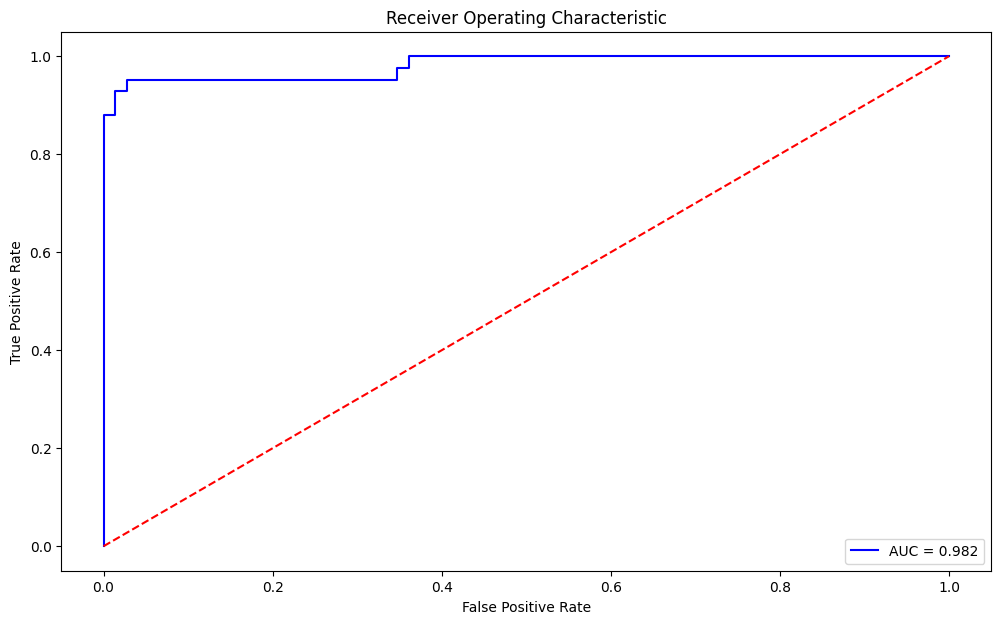

-----------------------------------------------------------------------------------------------------------

The ROC and the confusion matrix for training and testing in the last run:
-----------------------------------------------------------------------------------------------------------

Summary
                    Train      Test
auc_score        0.998200  0.990467
accuracy_score   0.986833  0.968600
precision_score  0.986867  0.969033
recall_score     0.986833  0.968600
f1_score         0.986833  0.968533


In [145]:
semi_output = monte_carlo_svm_semi(30)

## 1.(b) iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Initialize the algoritm randomly. 
#### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and took a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

#### C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

To ensure that the algorithm isn't stuck in a local minimum, set the n_init parameter in the KMeans algorithm.

In [148]:
# Function to calculate the distance of data points from centroids and return probabilities
def calculate_distance_probabilities(cluster_labels, centroids, features, labels):
    
    distances = np.ndarray((features.shape[0],))
    probabilities = np.ndarray((features.shape[0], 2))
    
    for index, point in enumerate(features):
        distances[index] = np.linalg.norm(centroids[cluster_labels[index]] - point)
        probabilities[index, 0] = np.linalg.norm(point - centroids[0])
        probabilities[index, 1] = np.linalg.norm(point - centroids[1])
        
    # Ussing softmax
    probabilities = softmax(probabilities, axis=1).astype(np.float64)
    
    return distances, probabilities

In [149]:
# Get majority class using majority polling
# Using closest 30 points in cluster
def majority_label(cluster_labels, distances, true_labels):
    predicted_labels = cluster_labels.copy()
    majority_labels = np.ndarray((2,), dtype='int')
    
    for cluster in [0, 1]:
        cluster_indices = np.where(cluster_labels == cluster)
        
        top_30_indices = sorted(cluster_indices[0].tolist(), key=lambda i: distances[i])[:30]
        
        majority_class = true_labels['label'].iloc[top_30_indices].value_counts(sort=True, ascending=False).index[0]
        predicted_labels[cluster_indices[0]] = majority_class
        majority_labels[majority_class] = cluster
    
    return majority_labels, predicted_labels

In [150]:
# Useful lInks: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1
# K-Means clustering method
def kmeans_method(train_features, train_labels, test_features, test_labels, plot_roc=False):

    random_seed = random.randint(0, 900)
    clusterer = KMeans(n_clusters=2, random_state=random_seed, n_init=15)
    kmeans_fit = clusterer.fit(train_features)
    
    cluster_train_labels = pd.Series(clusterer.predict(train_features))
    train_distances, train_probs = calculate_distance_probabilities(cluster_train_labels, kmeans_fit.cluster_centers_, train_features, train_labels)
    majority_train_labels, pred_train_labels = majority_label(cluster_train_labels, train_distances, train_labels)
    
    positive_class_index = 1 if majority_train_labels[0] == 1 else 0
    train_probabilities = [prob[positive_class_index] for prob in train_probs]
    
    # Print the classification report for train data set
    train_report = classification_report(train_labels, pred_train_labels, output_dict=True)
    train_eval = eval_metrics(train_labels, pred_train_labels, train_probabilities, train_report)
    
    cluster_test_labels = pd.Series(clusterer.predict(test_features))
    test_distances, test_probs = calculate_distance_probabilities(cluster_test_labels, kmeans_fit.cluster_centers_, test_features, test_labels)
    majority_test_labels, pred_test_labels = majority_label(cluster_test_labels, test_distances, test_labels)
    
    test_probabilities = [prob[positive_class_index] for prob in test_probs]
    
    test_report = classification_report(test_labels, pred_test_labels, output_dict=True)
    test_eval = eval_metrics(test_labels, pred_test_labels, test_probabilities, test_report)
    
    print('Train Accuracy Score:', train_eval['accuracy_score'], 'Test Accuracy Score:', test_eval['accuracy_score'])
    
    if plot_roc:
        print('Classification Report and AUC-ROC Curve for Training Data')
        plot_roc_curve(train_labels, pred_train_labels, train_probabilities)
        
        print('Classification Report and AUC-ROC Curve for Testing Data')
        plot_roc_curve(test_labels, pred_test_labels, test_probabilities)
    
    return train_eval, test_eval


In [151]:
# Run Monte Carlo simulation for K-Means
def monte_carlo_kmeans(num_runs):
    train_results_mc = []
    test_results_mc = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X, y, train_size=0.8, random_state=run * 50)
        print('\nRun:', run + 1, '-->')
        
        print('Shape --> train_features:', train_features.shape, ' test_features:', test_features.shape, 
              ' train_labels:', train_labels.shape, ' test_labels:', test_labels.shape)
        
        scaler = MinMaxScaler()
        train_features_norm = scaler.fit_transform(train_features)
        test_features_norm = scaler.transform(test_features)
        
        if run == num_runs - 1:
            train_eval, test_eval = kmeans_method(train_features_norm, train_labels, test_features_norm, test_labels, True)
            print('-----------------------------------------------------------------------------------------------------------')
            print('\nThe ROC and the confusion matrix for training and testing in the last run:')
        else:
            train_eval, test_eval = kmeans_method(train_features_norm, train_labels, test_features_norm, test_labels, False)
        
        train_results_mc.append(train_eval)
        test_results_mc.append(test_eval)
    
    train_results_df = pd.DataFrame(train_results_mc)
    test_results_df = pd.DataFrame(test_results_mc)
    
    summary_output = pd.concat([train_results_df.mean(), test_results_df.mean()], axis=1)
    summary_output.columns = ['Train', 'Test']
    
    print('-----------------------------------------------------------------------------------------------------------')
    print('\nSummary')
    print(summary_output)
    
    return summary_output



Run: 1 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.921 Test Accuracy Score: 0.912

Run: 2 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.921 Test Accuracy Score: 0.93

Run: 3 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.921 Test Accuracy Score: 0.939

Run: 4 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.925 Test Accuracy Score: 0.939

Run: 5 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.927 Test Accuracy Score: 0.93

Run: 6 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
T

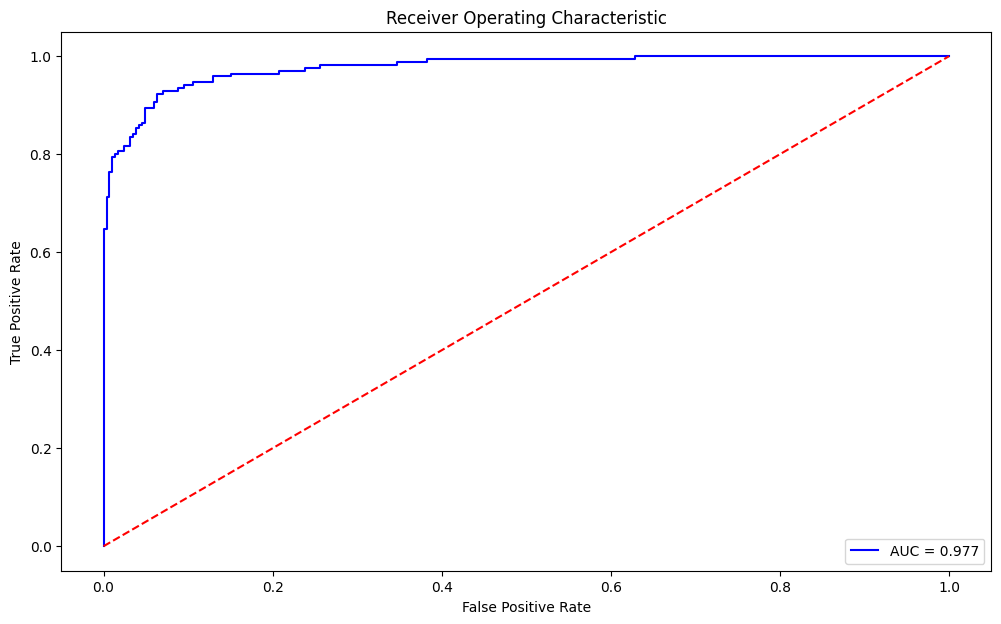

Classification Report and AUC-ROC Curve for Testing Data
[[68  4]
 [ 3 39]]


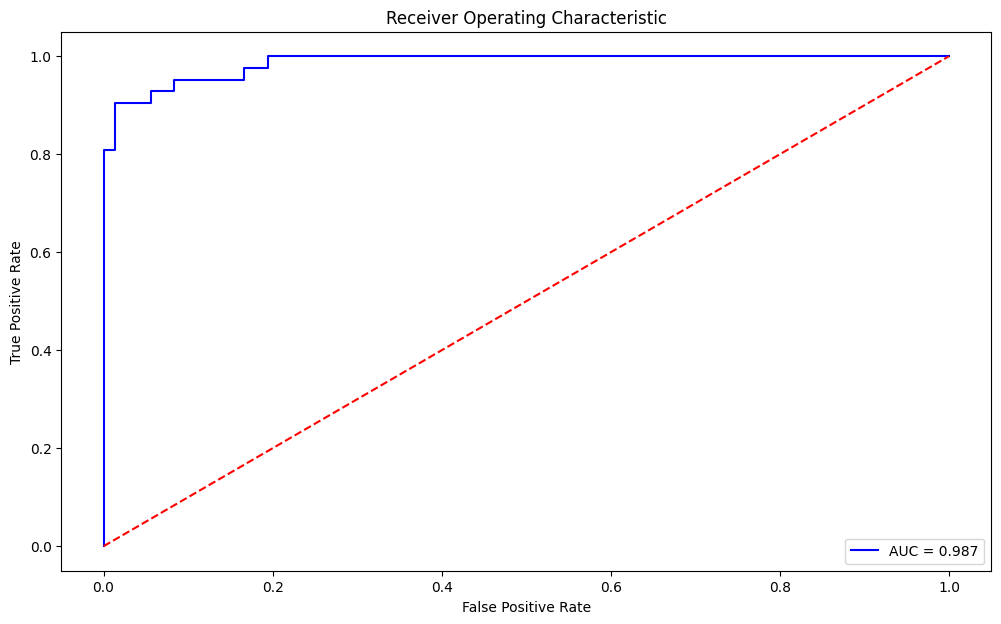

-----------------------------------------------------------------------------------------------------------

The ROC and the confusion matrix for training and testing in the last run:
-----------------------------------------------------------------------------------------------------------

Summary
                    Train      Test
auc_score        0.979800  0.980833
accuracy_score   0.925267  0.925967
precision_score  0.926867  0.928167
recall_score     0.925267  0.925967
f1_score         0.924300  0.924767


In [152]:
kmeans_output = monte_carlo_kmeans(30)

## 1.(b) iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels 
#### Use RBF kernel with gamma=1 or found a gamma for which the two clusters having the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members).

In [154]:
# Func determine maj class using maj polling
def majority_label_spectral(cluster_labels, true_labels):
    predicted_labels = cluster_labels.copy()
    majority_labels = np.ndarray((2,), dtype='int')
    
    for cluster in [0, 1]:
        cluster_indices = np.where(cluster_labels == cluster)
        random_30_indices = sorted(cluster_indices[0].tolist(), key=lambda i: i)[:30]
        
        majority_class = true_labels['label'].iloc[random_30_indices].value_counts(sort=True, ascending=False).index[0]
        predicted_labels[cluster_indices[0]] = majority_class
        majority_labels[majority_class] = cluster
    
    return majority_labels, predicted_labels

In [155]:
# Function to calculate the probability of labels in clusters
def calculate_probabilities_spectral(cluster_labels, centroids, features, labels):
    
    probabilities = np.ndarray((features.shape[0], 2))
    
    for index, point in enumerate(features):
        probabilities[index, 0] = np.linalg.norm(point - centroids[0])
        probabilities[index, 1] = np.linalg.norm(point - centroids[1])
        
    # Dist converted to probs via softmax
    probabilities = softmax(probabilities, axis=1).astype(np.float64)
    
    return probabilities

In [156]:
#Useful Links: 
# https://towardsdatascience.com/spectral-clustering-aba2640c0d5b#:~:text=Spectral%20clustering%20is%20a%20technique,non%20graph%20data%20as%20well.
# https://towardsdatascience.com/spectral-clustering-for-beginners-d08b7d25b4d8
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

# Function to implement spectral clustering
def spectral_clustering_method(train_features, train_labels, test_features, test_labels, plot_roc=False):

    # Perform spectral clustering
    cluster_labels = SpectralClustering(
        n_clusters=2, assign_labels='kmeans', affinity='rbf', gamma=1,
        eigen_solver='arpack', random_state=50, n_init=15
    ).fit_predict(train_features)
    
    centroids = []
    for cluster in [0, 1]:
        centroids.append(np.mean(train_features[cluster_labels == cluster], axis=0).tolist())
        
    knn_classifier = KNeighborsClassifier(n_neighbors=1)
    knn_classifier.fit(train_features, cluster_labels)
    
    train_cluster_labels = knn_classifier.predict(train_features)
    train_probs = calculate_probabilities_spectral(train_cluster_labels, centroids, train_features, train_labels)    
    majority_train_labels, pred_train_labels = majority_label_spectral(train_cluster_labels, train_labels)
    
    positive_class_index = 1 if majority_train_labels[0] == 1 else 0
    train_probabilities = [prob[positive_class_index] for prob in train_probs]
    
    train_report = classification_report(train_labels, pred_train_labels, output_dict=True)
    train_eval = eval_metrics(train_labels, pred_train_labels, train_probabilities, train_report)
    
    test_cluster_labels = knn_classifier.predict(test_features)
    test_probs = calculate_probabilities_spectral(test_cluster_labels, centroids, test_features, test_labels)    
    majority_test_labels, pred_test_labels = majority_label_spectral(test_cluster_labels, test_labels)
    
    test_probabilities = [prob[positive_class_index] for prob in test_probs]
    
    test_report = classification_report(test_labels, pred_test_labels, output_dict=True)
    test_eval = eval_metrics(test_labels, pred_test_labels, test_probabilities, test_report)
    
    print('Train Accuracy Score:', train_eval['accuracy_score'], 'Test Accuracy Score:', test_eval['accuracy_score'])
    
    if plot_roc:
        print('Classification Report and AUC-ROC Curve for Training Data')
        plot_roc_curve(train_labels, pred_train_labels, train_probabilities)
        
        print('Classification Report and AUC-ROC Curve for Testing Data')
        plot_roc_curve(test_labels, pred_test_labels, test_probabilities)
    
    return train_eval, test_eval

In [157]:
# Monte Carlo simulation for spectral clustering
def monte_carlo_spectral(num_runs):
    train_results_mc = []
    test_results_mc = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X, y, train_size=0.8, random_state=run * 50)
        print('\nRun:', run + 1, '-->')
        
        print('Shape --> train_features:', train_features.shape, ' test_features:', test_features.shape, 
              ' train_labels:', train_labels.shape, ' test_labels:', test_labels.shape)
        
        scaler = MinMaxScaler()
        train_features_norm = scaler.fit_transform(train_features)
        test_features_norm = scaler.transform(test_features)
        
        if run == num_runs - 1:
            train_eval, test_eval = spectral_clustering_method(train_features_norm, train_labels, test_features_norm, test_labels, True)
            print('-----------------------------------------------------------------------------------------------------------')
            print('\nThe ROC and the confusion matrix for training and testing in the last run:')
        else:
            train_eval, test_eval = spectral_clustering_method(train_features_norm, train_labels, test_features_norm, test_labels, False)
        
        train_results_mc.append(train_eval)
        test_results_mc.append(test_eval)
    
    train_results_df = pd.DataFrame(train_results_mc)
    test_results_df = pd.DataFrame(test_results_mc)
    
    summary_output = pd.concat([train_results_df.mean(), test_results_df.mean()], axis=1)
    summary_output.columns = ['Train', 'Test']
    
    print('-----------------------------------------------------------------------------------------------------------')
    print('\nSummary')
    print(summary_output)
    
    return summary_output


Run: 1 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.824 Test Accuracy Score: 0.842

Run: 2 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.862 Test Accuracy Score: 0.877

Run: 3 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.864 Test Accuracy Score: 0.833

Run: 4 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.851 Test Accuracy Score: 0.868

Run: 5 -->
Shape --> train_features: (455, 30)  test_features: (114, 30)  train_labels: (455, 1)  test_labels: (114, 1)
Train Accuracy Score: 0.853 Test Accuracy Score: 0.895
Classification Report and AUC-ROC Curve for Training Data
[[282   3]
 [ 64 106]]


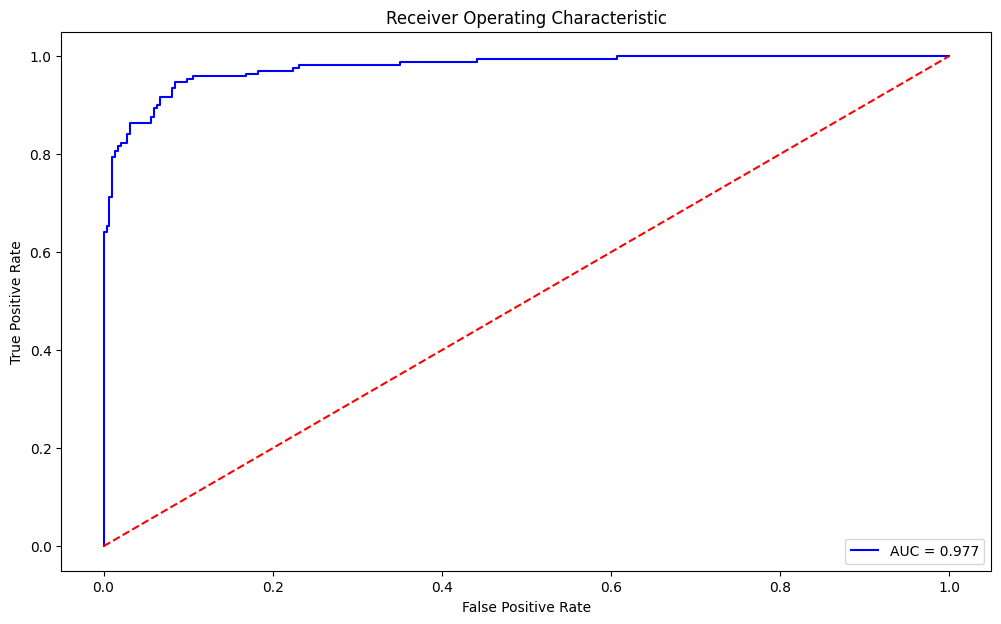

Classification Report and AUC-ROC Curve for Testing Data
[[72  0]
 [12 30]]


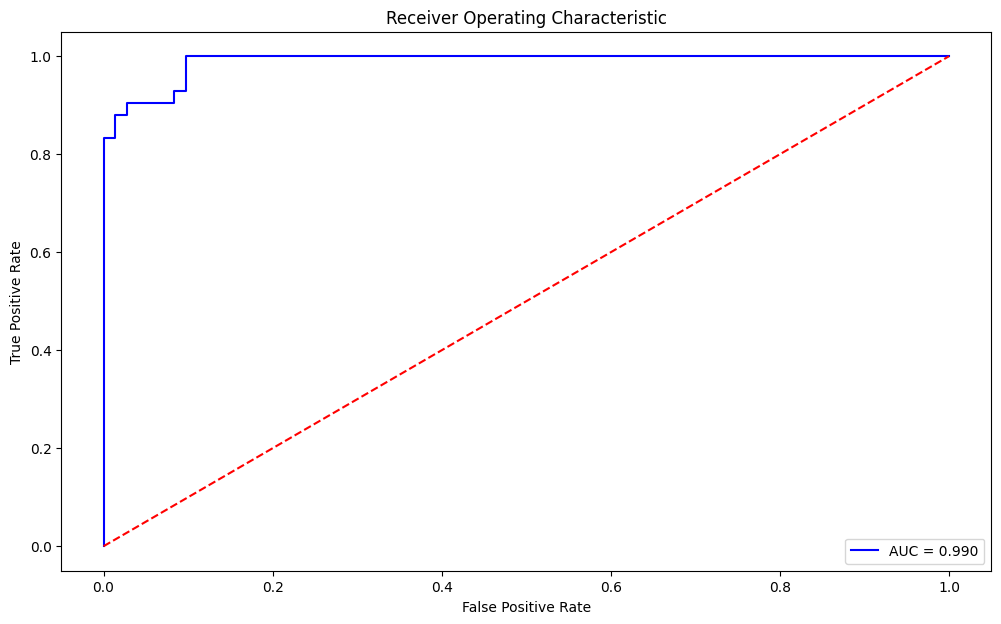

-----------------------------------------------------------------------------------------------------------

The ROC and the confusion matrix for training and testing in the last run:
-----------------------------------------------------------------------------------------------------------

Summary
                  Train    Test
auc_score        0.9784  0.9810
accuracy_score   0.8508  0.8630
precision_score  0.8730  0.8880
recall_score     0.8508  0.8630
f1_score         0.8408  0.8536


In [158]:
spectral_output = monte_carlo_spectral(5)

## 1.(b) v. Compare the results for all the above models

In [160]:
print('The comparison of the various learning methods')
print('The output for Supervised Learning: \n', supervised_output)
print('------------------------------------------------------------------------')
print('The output for Semi-Supervised Learning: \n', semi_output)
print('------------------------------------------------------------------------')
print('The output for (Unsupervised) k-means Learning: \n', kmeans_output)
print('------------------------------------------------------------------------')
print('The output for (Unsupervised) Spectral Learning: \n', spectral_output)
print('------------------------------------------------------------------------')

The comparison of the various learning methods
The output for Supervised Learning: 
                     Train      Test
auc_score        0.997733  0.991433
accuracy_score   0.985933  0.969267
precision_score  0.986000  0.969967
recall_score     0.985933  0.969267
f1_score         0.985933  0.969100
------------------------------------------------------------------------
The output for Semi-Supervised Learning: 
                     Train      Test
auc_score        0.998200  0.990467
accuracy_score   0.986833  0.968600
precision_score  0.986867  0.969033
recall_score     0.986833  0.968600
f1_score         0.986833  0.968533
------------------------------------------------------------------------
The output for (Unsupervised) k-means Learning: 
                     Train      Test
auc_score        0.979800  0.980833
accuracy_score   0.925267  0.925967
precision_score  0.926867  0.928167
recall_score     0.925267  0.925967
f1_score         0.924300  0.924767
----------------------------

Summary: We notice that the supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.And the unsupervised learning underperforms in such situations.

# 2. Active Learning Using Support Vector Machines

### 2. (a) Download the banknote authentication Data Set. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [165]:
file_path_banknote = '../data/data_banknote_authentication.txt'

bank_data = pd.read_csv(file_path_banknote, sep=',', skiprows=0, header=None)
bank_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
bank_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [166]:
bank_data.groupby(['class']).agg({'class': ['count']})

,class
,count
class,
0,762
1,610


In [167]:
X_bank = bank_data.iloc[:, :-1]
y_bank = bank_data.iloc[:, -1]
X_bank, y_bank

(      variance  skewness  curtosis  entropy
 0      3.62160   8.66610   -2.8073 -0.44699
 1      4.54590   8.16740   -2.4586 -1.46210
 2      3.86600  -2.63830    1.9242  0.10645
 3      3.45660   9.52280   -4.0112 -3.59440
 4      0.32924  -4.45520    4.5718 -0.98880
 ...        ...       ...       ...      ...
 1367   0.40614   1.34920   -1.4501 -0.55949
 1368  -1.38870  -4.87730    6.4774  0.34179
 1369  -3.75030 -13.45860   17.5932 -2.77710
 1370  -3.56370  -8.38270   12.3930 -1.28230
 1371  -2.54190  -0.65804    2.6842  1.19520
 
 [1372 rows x 4 columns],
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1367    1
 1368    1
 1369    1
 1370    1
 1371    1
 Name: class, Length: 1372, dtype: int64)

In [168]:
# Split the data into training and testing sets
bank_train, bank_test = train_test_split(bank_data, train_size=0.656, random_state=50)
bank_train, bank_test

(      variance  skewness  curtosis  entropy  class
 1074  -0.41965   2.90940 -1.785900 -2.20690      1
 168   -1.80300  11.88180  2.045800 -5.27280      0
 889   -1.30660   0.25244  0.762300  1.77580      1
 914   -2.53460  -0.77392  3.360200  0.00171      1
 542    2.82320  10.85130 -3.146600 -3.97840      0
 ...        ...       ...       ...      ...    ...
 229    5.49440   1.54780  0.041694  1.92840      0
 70     3.95290  -2.35480  2.379200  0.48274      0
 132    2.01390   6.14160  0.379290  0.56938      0
 1313  -1.50780  -7.31910  7.898100  1.22890      1
 109    2.91630  10.83060 -3.343700 -4.12200      0
 
 [900 rows x 5 columns],
       variance  skewness  curtosis  entropy  class
 1032  0.163580 -3.358400  1.374900  1.35690      1
 852  -4.886100  7.054200 -0.172520 -6.95900      1
 885   0.030219 -1.051200  1.402400  0.77369      1
 1183 -3.574100  3.944000 -0.079120 -2.12030      1
 262   1.811400  7.606700 -0.978800 -2.46680      0
 ...        ...       ...       ...  

In [169]:
display(bank_train.describe())
bank_train.groupby(['class']).agg({'class': ['count']})

,variance,skewness,curtosis,entropy,class
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.429564,1.901608,1.479107,-1.164940,0.441111
std,2.876163,5.738178,4.279628,2.108746,0.496796
min,-7.042100,-13.773100,-5.261300,-8.548200,0.000000
25%,-1.798950,-1.434050,-1.357500,-2.200075,0.000000
50%,0.499450,2.222400,0.686040,-0.571775,0.000000
75%,2.835350,6.452550,3.396025,0.398045,1.000000
max,6.824800,12.730200,17.927400,2.449500,1.000000


,class
,count
class,
0,503
1,397


In [170]:
display(bank_test.describe())
bank_test.groupby(['class']).agg({'class': ['count']})

,variance,skewness,curtosis,entropy,class
count,472.000000,472.000000,472.000000,472.000000,472.000000
mean,0.441688,1.961909,1.242262,-1.242598,0.451271
std,2.780966,6.116847,4.367764,2.087469,0.498148
min,-7.036400,-13.659300,-5.286100,-7.758100,0.000000
25%,-1.750475,-1.947225,-1.940825,-2.599325,0.000000
50%,0.482360,2.625900,0.391285,-0.617035,0.000000
75%,2.776575,7.093500,3.052600,0.381235,1.000000
max,6.091900,12.951600,17.677200,2.162500,1.000000


,class
,count
class,
0,259
1,213


### 2.  (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
#### 2. (b) i. Passive Learning
#### (b) i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. 
#### Note:The replacement of the samples back into the training set at each step was NOT done. 
#### Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors.

In [172]:
# Useful Link:  https://www.researchgate.net/publication/337929432_Online_Learning_and_Active_Learning_A_comparative_study_of_Passive-Aggressive_Algorithm_with_Support_Vector_Machine_SVM
# Prompt used: "How can I implement Passive Learning with SVM and use GridSearchCV for hyperparameter optimization?", 
# (6 lines), GPT-Generated
# Response:
# used_indices = []
# while len(available_indices) > 0:
#     np.random.shuffle(available_indices)
#     used_indices.extend(available_indices[:10])
#     available_indices = available_indices[10:]
#     subset_X_train = X_train.iloc[used_indices]
#     subset_y_train = y_train.iloc[used_indices]
#     grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=5)
#     grid_search.fit(subset_X_train, subset_y_train)
#     # Evaluation of model performance

# Function to implement Passive Learning using SVM
def svm_classifier_passive(train_features, train_labels, test_features, test_labels, model, param_grid):
    
    available_indices = np.arange(train_features.shape[0])
    used_indices = []
    accuracy_train_list = []
    accuracy_test_list = []
    
    while len(available_indices) > 0:
        np.random.shuffle(available_indices)
        used_indices.extend(available_indices[:10])
        available_indices = available_indices[10:]
        
        subset_train_features = train_features.iloc[used_indices]
        subset_train_labels = train_labels.iloc[used_indices]
        
        # Fit GridSearchCV
        grid_search = GridSearchCV(estimator=model, **param_grid)
        grid_search.fit(subset_train_features, subset_train_labels)
        
        pred_train = grid_search.predict(subset_train_features)
        prob_train = grid_search.decision_function(subset_train_features)
        train_report = classification_report(subset_train_labels, pred_train, output_dict=True)

        pred_test = grid_search.predict(test_features)
        prob_test = grid_search.decision_function(test_features)
        test_report = classification_report(test_labels, pred_test, output_dict=True)

        accuracy_train_list.append(train_report['accuracy'])
        accuracy_test_list.append(test_report['accuracy'])
        
    return accuracy_train_list, accuracy_test_list

In [173]:
# Setting up parameters for LinearSVC with 'l1' penalty
param_range_l1 = {'C': np.logspace(-3, 6, 10)}
cross_val_l1 = StratifiedKFold(5, random_state=50, shuffle=True)
tuning_params_l1 = {'param_grid': param_range_l1, 'cv': cross_val_l1, 'scoring': 'f1_weighted', 'verbose': 0}

In [174]:
def monte_carlo_svm_passive(num_runs):
    train_accuracy_list = []
    test_accuracy_list = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X_bank, y_bank, train_size=0.656, random_state=run * 50)
        
        print('\nRun:', run + 1, '-->')
        if run == num_runs - 1:
            train_accuracy, test_accuracy = svm_classifier_passive(
                train_features, train_labels, test_features, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_l1
            )
        else:
            train_accuracy, test_accuracy = svm_classifier_passive(
                train_features, train_labels, test_features, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_l1
            )
        
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
        print('Training Accuracy with top 10 samples:', round(train_accuracy[0], 4), 
              ' ; Training Accuracy with 900 samples:', round(train_accuracy[-1], 4))
        print('Testing Accuracy with top 10 samples:', round(test_accuracy[0], 4), 
              ' ; Testing Accuracy with 900 samples:', round(test_accuracy[-1], 4))
        
    return np.mean(np.array(train_accuracy_list), axis=0), np.mean(np.array(test_accuracy_list), axis=0)


In [175]:
training_LC_passive, testing_LC_passive = monte_carlo_svm_passive(50)


Run: 1 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.9889
Testing Accuracy with top 10 samples: 0.7818  ; Testing Accuracy with 900 samples: 0.9936

Run: 2 -->
Training Accuracy with top 10 samples: 0.9  ; Training Accuracy with 900 samples: 0.9944
Testing Accuracy with top 10 samples: 0.5551  ; Testing Accuracy with 900 samples: 0.9852

Run: 3 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.9933
Testing Accuracy with top 10 samples: 0.9068  ; Testing Accuracy with 900 samples: 0.9852

Run: 4 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.99
Testing Accuracy with top 10 samples: 0.8792  ; Testing Accuracy with 900 samples: 0.9852

Run: 5 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.99
Testing Accuracy with top 10 samples: 0.9004  ; Testing Accuracy with 900 samples: 0.9915

Run: 6 -->
Training Accuracy with top 10 samples

## 2. (b) ii. Active learning
#### Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. 
#### Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. 
#### Trained a new SVM using the pool. Repeat this process until all training data is used. In total, we have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors.

In [177]:
# Function to implement Active Learning using SVM
def svm_classifier_active(train_features, train_labels, test_features, test_labels, model, param_grid):
    
    available_indices = np.arange(train_features.shape[0])
    used_indices = []
    accuracy_train_list = []
    accuracy_test_list = []
    
    while True:
        np.random.shuffle(available_indices)
        used_indices.extend(available_indices[:10])

        count_0, count_1 = 0, 0
        for index in used_indices:
            if train_labels.iloc[index] == 0:
                count_0 += 1
            else:
                count_1 += 1

        if count_1 == 0 or count_0 == 0:
            used_indices = []
        else:
            break

    available_indices = available_indices[10:]
    
    while len(available_indices) > 0:
    
        subset_train_features = train_features.iloc[used_indices]
        subset_train_labels = train_labels.iloc[used_indices]
        
        grid_search = GridSearchCV(estimator=model, **param_grid)
        grid_search.fit(subset_train_features, subset_train_labels)
        
        pred_train = grid_search.predict(subset_train_features)
        prob_train = grid_search.decision_function(subset_train_features)
        train_report = classification_report(subset_train_labels, pred_train, output_dict=True)

        pred_test = grid_search.predict(test_features)
        prob_test = grid_search.decision_function(test_features)
        test_report = classification_report(test_labels, pred_test, output_dict=True)

        accuracy_train_list.append(train_report['accuracy'])
        accuracy_test_list.append(test_report['accuracy'])
        
        # Compute dist from hyperplane and sort
        distances = grid_search.decision_function(train_features.iloc[available_indices])
        sorted_indices = np.arange(len(available_indices))
        sorted_indices = sorted(sorted_indices, key=lambda i: abs(distances[i]))
        
        available_indices = available_indices[sorted_indices]
        used_indices.extend(available_indices[:10])
        available_indices = available_indices[10:]
    
    return accuracy_train_list, accuracy_test_list


In [178]:
# Setting up parameters for LinearSVC with 'l1' penalty
param_range_active = {'C': np.logspace(-3, 6, 10)}
cross_val_active = StratifiedKFold(5, random_state=50, shuffle=True)
tuning_params_active = {'param_grid': param_range_active, 'cv': cross_val_active, 'scoring': 'f1_weighted', 'verbose': 0}

In [179]:
# Function to run Monte Carlo simulation for Active Learning SVM
def monte_carlo_svm_active(num_runs):
    train_accuracy_list = []
    test_accuracy_list = []
    
    for run in range(num_runs):
        train_features, test_features, train_labels, test_labels = split_data(X_bank, y_bank, train_size=0.656, random_state=run * 50)
        print('\nRun:', run + 1, '-->')
        
        if run == num_runs - 1:
            train_accuracy, test_accuracy = svm_classifier_active(
                train_features, train_labels, test_features, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_active
            )
        else:
            train_accuracy, test_accuracy = svm_classifier_active(
                train_features, train_labels, test_features, test_labels,
                LinearSVC(penalty='l1', dual=False, max_iter=1000), tuning_params_active
            )
        
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)
        
        print('Training Accuracy with top 10 samples:', round(train_accuracy[0], 4), 
              ' ; Training Accuracy with 900 samples:', round(train_accuracy[-1], 4))
        print('Testing Accuracy with top 10 samples:', round(test_accuracy[0], 4), 
              ' ; Testing Accuracy with 900 samples:', round(test_accuracy[-1], 4))
        
    return np.mean(np.array(train_accuracy_list), axis=0), np.mean(np.array(test_accuracy_list), axis=0)

In [180]:
training_LC_active, testing_LC_active = monte_carlo_svm_active(50)


Run: 1 -->
Training Accuracy with top 10 samples: 0.9  ; Training Accuracy with 900 samples: 0.9888
Testing Accuracy with top 10 samples: 0.8898  ; Testing Accuracy with 900 samples: 0.9936

Run: 2 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.9933
Testing Accuracy with top 10 samples: 0.9534  ; Testing Accuracy with 900 samples: 0.9852

Run: 3 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.9933
Testing Accuracy with top 10 samples: 0.8347  ; Testing Accuracy with 900 samples: 0.9852

Run: 4 -->
Training Accuracy with top 10 samples: 0.9  ; Training Accuracy with 900 samples: 0.9888
Testing Accuracy with top 10 samples: 0.8729  ; Testing Accuracy with 900 samples: 0.9936

Run: 5 -->
Training Accuracy with top 10 samples: 1.0  ; Training Accuracy with 900 samples: 0.9899
Testing Accuracy with top 10 samples: 0.8835  ; Testing Accuracy with 900 samples: 0.9915

Run: 6 -->
Training Accuracy with top 10 sam

## 2.(c) Learning Curve 
#### Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. : Monte Carlo simulation. 
#### Plot average test error versus number of training instances for both active and passive learners on the same figure and report the conclusions

In [182]:
def plot_learning_curve(passive, active, label):
    x_axis = np.arange(1, 90) * 10
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.plot(x_axis, 1 - passive, label='Passive')
    axes.plot(x_axis, 1 - active, label='Active')
    axes.legend()
    axes.set_xlabel("Training Set Size")
    axes.set_ylabel(label)
    axes.set_title("Learning Curve")
    plt.show()


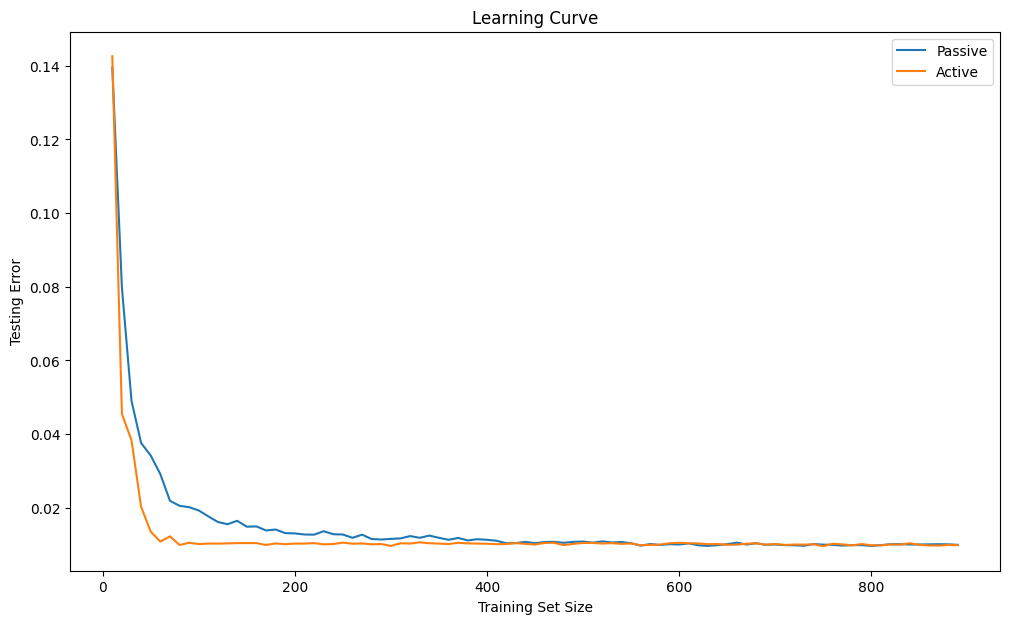

In [183]:
plot_learning_curve(testing_LC_passive[:-1], testing_LC_active, "Testing Error")

Conclusion: The error rates for both active and passive learning are pretty much on par with each other